# Revisão Módulo 4.

## Regularizações Ridge e Lasso:

O [conjunto de dados](http://data.princeton.edu/wws509/datasets/#salary) consiste em dados salariais de 52 professores de uma pequena universidade, categorizados por:

- sx = Sex, coded 1 for female and 0 for male
- `rk` = Rank, coded
- `1` for assistant professor,
- `2` for associate professor, and
- `3` for full professor
- `yr` = Number of years in current rank
- `dg` = Highest degree, coded 1 if doctorate, 0 if masters
- `yd` = Number of years since highest degree was earned
- `sl` = Academic year salary, in dollars.

In [1]:
%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('salary.dat.txt', 
                 delim_whitespace = True
                )

In [3]:
df.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


male      38
female    14
Name: sx, dtype: int64


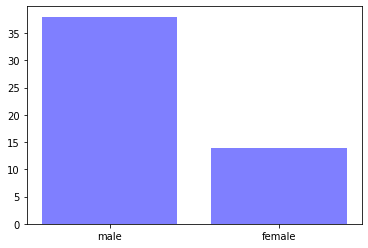

full         20
assistant    18
associate    14
Name: rk, dtype: int64


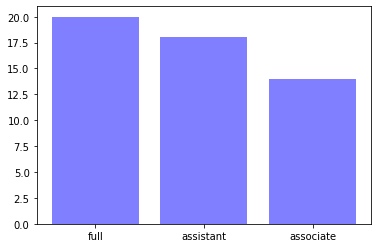

doctorate    34
masters      18
Name: dg, dtype: int64


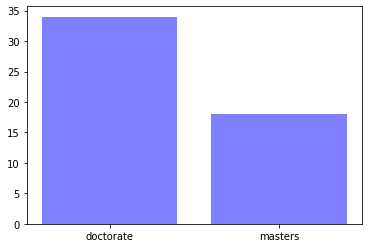

In [4]:
categories = ['sx', 'rk', 'dg']

for category in categories:
    print(df[category].value_counts())
    plt.bar(df[category].value_counts().index, 
            df[category].value_counts().values, 
            color = 'b', 
            alpha = 0.5)
    plt.show()

In [5]:
for category in categories:
    serie = df[category]
    dummies = pd.get_dummies(serie, drop_first = True, prefix = category)
    df = pd.concat([df, dummies], axis = 1)

df.head()

,sx,rk,yr,dg,yd,sl,sx_male,rk_associate,rk_full,dg_masters
0,male,full,25,doctorate,35,36350,1,0,1,0
1,male,full,13,doctorate,22,35350,1,0,1,0
2,male,full,10,doctorate,23,28200,1,0,1,0
3,female,full,7,doctorate,27,26775,0,0,1,0
4,male,full,19,masters,30,33696,1,0,1,1


In [6]:
X = df[['yr', 'yd']]
y = df['sl']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.35, 
                                                    random_state = 10
                                                   )

lm = linear_model.LinearRegression()

model_1 = lm.fit(X_train, 
                 y_train
                )

print('Score model_1:', model_1.score(X_test, y_test))

Score model_1: 0.27287811791681993


In [7]:
lm_ridge = linear_model.RidgeCV(alphas = [0.1, 1, 10],
                                normalize = True
                               ) 

model_ridge = lm_ridge.fit(X_train, 
                       y_train
                      )

print('Score model_ridge:', model_ridge.score(X_test, y_test))

Score model_ridge: 0.28483523618008433


In [8]:
#from sklearn.linear_model import LassoCV
lm_lasso = linear_model.LassoCV(alphas = [0.1, 1, 10],
                                normalize = True
                               ) 

model_lasso = lm_lasso.fit(X_train, 
                       y_train
                      )

print('Score model_lasso:', model_lasso.score(X_test, y_test))

Score model_lasso: 0.275939381579249


## Clustering.

### Kmeans

In [1]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # for plot styling
import numpy as np
from sklearn.cluster import KMeans

In [2]:
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer()
df.data.shape

(569, 30)

In [3]:
print(df.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
kmeans = KMeans(n_clusters = 4, 
                random_state = 0
               )

clusters = kmeans.fit_predict(df.data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

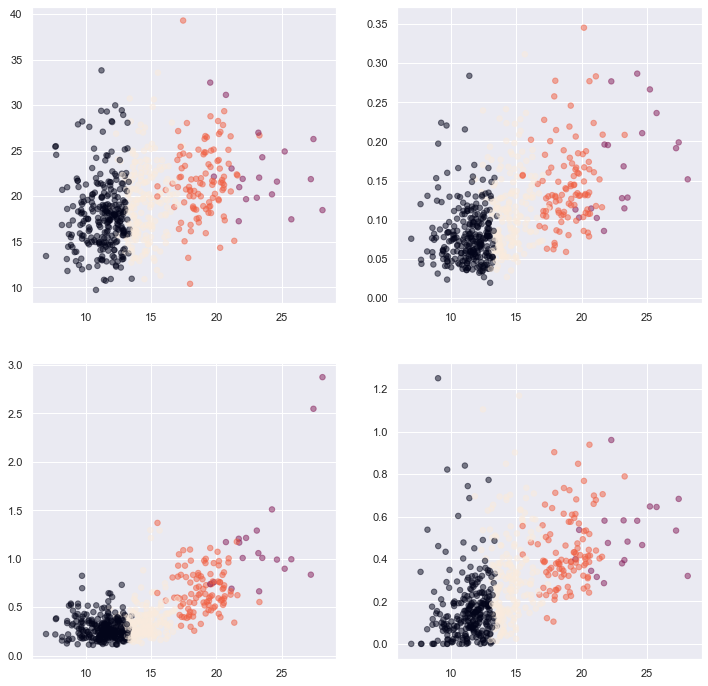

In [5]:
plt.figure(figsize = (12, 12))

ax1 = plt.subplot(221)

#pontos
ax1.scatter(df.data[:, 0], 
            df.data[:, 1], 
            c = labels, 
            alpha = 0.5, 
            s = 30
           )
ax1 = plt.subplot(222)
ax1.scatter(df.data[:, 0], 
            df.data[:, 5], 
            c = labels, 
            alpha = 0.5, 
            s = 30
           )
ax1 = plt.subplot(223)
ax1.scatter(df.data[:, 0], 
            df.data[:, 10], 
            c = labels, 
            alpha = 0.5, 
            s = 30
           )
ax1 = plt.subplot(224)
ax1.scatter(df.data[:, 0], 
            df.data[:, 26], 
            c = labels, 
            alpha = 0.5, 
            s = 30
           );

In [6]:
from sklearn.metrics import silhouette_score

(df.data, labels)  

silhouette_score(df.data, 
                 labels
                )

0.5334614737117133

In [7]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(df.data, labels)

1465.6728614582266

## Maldição de dimensionalidade

### PCA

### Exemplo: Wine Class Dataset

#### Pra começar, iremos explorar um [`dataset`](https://www.kaggle.com/brynja/wineuci) com características de vinhos e sua respectiva classe. O objetivo dessa primeira parte é entender quais características fazem de um vinho uma bebida de qualidade. Vamos importar o dataset e já chamar o método `.info()`:

In [25]:
# importando as bibliotecas
from sklearn.decomposition import PCA
# instanciando o modelo
pca3 = PCA(n_components = 3)
# ajustando e transformando os dados de treino
X_pca3 = pca3.fit_transform(X)

In [26]:
%%time

wine = pd.read_csv('Wine.csv',
                   names = ['class','alcohol','malic_acid','ash','ash_alcalinity',
                          'magnesium','total_phenols','flavanoids','nonflavanoids_phenols',
                          'proanthocyanins','color_intensity','hue','dilution','proline']
                  )
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   class                  178 non-null    int64  
 1   alcohol                178 non-null    float64
 2   malic_acid             178 non-null    float64
 3   ash                    178 non-null    float64
 4   ash_alcalinity         178 non-null    float64
 5   magnesium              178 non-null    int64  
 6   total_phenols          178 non-null    float64
 7   flavanoids             178 non-null    float64
 8   nonflavanoids_phenols  178 non-null    float64
 9   proanthocyanins        178 non-null    float64
 10  color_intensity        178 non-null    float64
 11  hue                    178 non-null    float64
 12  dilution               178 non-null    float64
 13  proline                178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
CPU times: 

In [27]:
wine['class'].value_counts()

2    71
1    59
3    48
Name: class, dtype: int64

In [28]:
wine.columns

Index(['class', 'alcohol', 'malic_acid', 'ash', 'ash_alcalinity', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoids_phenols',
       'proanthocyanins', 'color_intensity', 'hue', 'dilution', 'proline'],
      dtype='object')

In [29]:
X = wine.iloc[:, 1:].values 
y = wine.iloc[:, 0].values

In [30]:
# importando as bibliotecas
from sklearn.preprocessing import StandardScaler 
# instanciando a variável
sc = StandardScaler() 
# ajustando com os dados de treino
X = sc.fit_transform(X)

In [31]:
# importando as bibliotecas
from sklearn.decomposition import PCA
# instanciando o modelo
pca2 = PCA(n_components = 2)
# ajustando com os dados de treino
X_pca2 = pca2.fit_transform(X)

In [32]:
pca_df3 = pd.DataFrame(X_pca3, 
                       columns = ['pca_1', 'pca_2', 'pca_3']
                      )
pca_df3['class'] = wine['class']
pca_df3.head()

,pca_1,pca_2,pca_3,class
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1


In [33]:
pca_df2['class'].value_counts()

2    71
1    59
3    48
Name: class, dtype: int64

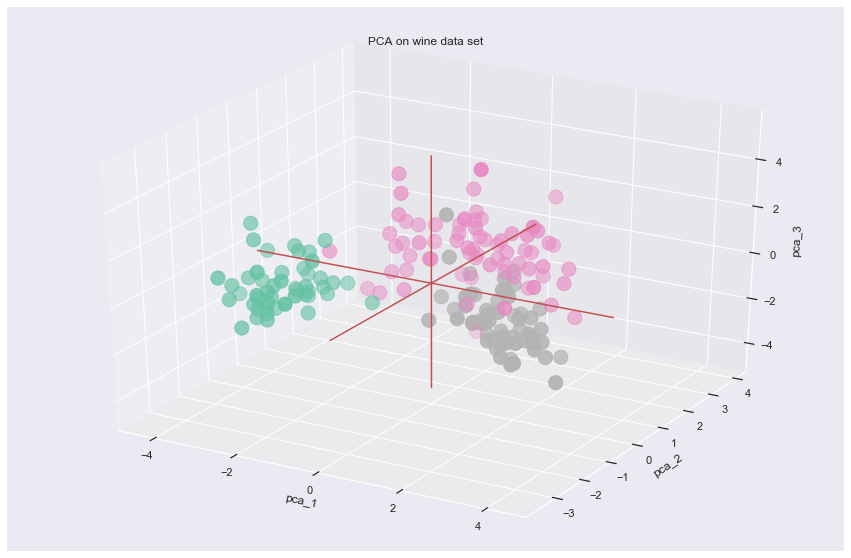

In [34]:
# Plot initialisation
from mpl_toolkits.mplot3d import Axes3D

my_color = pca_df3['class']

labels = [pca_df3['pca_1'], 
          pca_df3['pca_2'], 
          pca_df3['pca_3']
         ]

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, 
                     projection = '3d'
                    )

ax.scatter(pca_df3['pca_1'], 
           pca_df3['pca_2'], 
           pca_df3['pca_3'], 
           c = my_color, 
           cmap = "Set2_r", 
           s = 200, 
           label = labels
          )
 
# make simple, bare axis lines through space:
xAxisLine = ((min(pca_df3['pca_1']), 
              max(pca_df3['pca_1'])), 
             (0, 0), 
             (0,0)
            )
ax.plot(xAxisLine[0], 
        xAxisLine[1], 
        xAxisLine[2], 
        'r'
       )

yAxisLine = ((0, 0), 
             (min(pca_df3['pca_2']), max(pca_df3['pca_2'])), 
             (0,0)
            )
ax.plot(yAxisLine[0], 
        yAxisLine[1], 
        yAxisLine[2], 
        'r'
       )
zAxisLine = ((0, 0), 
             (0, 0), 
             (min(pca_df3['pca_3']), max(pca_df3['pca_3']))
            )
ax.plot(zAxisLine[0], 
        zAxisLine[1], 
        zAxisLine[2], 
        'r'
       )
# label the axes
ax.set_xlabel("pca_1")
ax.set_ylabel("pca_2")
ax.set_zlabel("pca_3")
ax.set_title("PCA on wine data set")
plt.show()